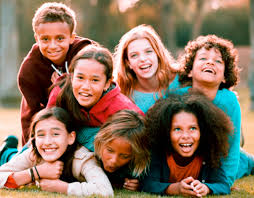

##**Friendship goals**
**Problem**

To celebrate this precious relationship of friendship on the upcoming International Friendship Day, we bring a deep learning challenge to you: #FriendshipGoals. The Anthropology department of an Ivy League school is planning to study the impact of friendship at different life stages. You have been hired as a deep learning specialist to assist their team in this project.

Your task is to build a deep learning model that analyzes an image of a gathering among friends, detects the age group of the gathering, and classifies them into groups of toddlers, teenagers, or adults.

##**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 

### **load images in three differnt cata to classifies them into groups of toddlers, teenagers, or adults.**

In [52]:
import cv2 # Used for image processing
import os   # The OS module in Python provides functions for interacting with the operating system
import glob   # used to retrieve files/pathnames matching a specified pattern


In [ ]:
# Adults datasets images
path = "/content/drive/MyDrive/train_data/Adults/*.jpg"
glob.glob(path)


In [ ]:
# Teenagers DataSets Images
path1= "/content/drive/MyDrive/train_data/Teenagers/*.jpg"
glob.glob(path1)

In [ ]:
# Toddler DataSets images
path2= "/content/drive/MyDrive/train_data/Toddler/*.jpg"
glob.glob(path2)

## **Collect all Images in single fram & categories tham**

load all image in images=[] file & load All Lebels in labels=[] Files

In [8]:
images=[]  # Store Images here
labels=[]  # Store Labels here

for image in glob.glob(path):
  img = cv2.imread(image)
  img = cv2.resize(img,(150,150))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  images.append(img)
  labels.append(0)   # 0 Means Adult


for image1 in glob.glob(path1):
  img1 = cv2.imread(image1)
  img1 = cv2.resize(img1,(150,150))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  images.append(img)
  labels.append(1)   # 1 Means Teenegers

for image3 in glob.glob(path2):
  img2 = cv2.imread(image3)
  img2= cv2.resize(img2,(150,150))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  images.append(img2)
  labels.append(2)   # 2 Means Toddler


display the class name of images

In [9]:
  Class_Names = ["Adult" ,  "Teenager" ,"Toddler"]

##**images Independent Variable**

We have images & Lables Using this data we train the Model.

Using this data the machine understand which image belongs to which class.

###Nice. So, we have converted our labels file into numpy array. But how about images file? Shouldn't it be a numpy array also?

In [10]:
images= np.array(images)  # Train DataSet for Model

##**Traget Variable is labels**

In [11]:
labels= np.array(labels)

#==============   ***Deep Leraning Model***  ===================

#***Model Train Using Convolutional Neural Network (CNN)***

##**Using TensorFlow & keras Sequential API In Python**


##**Import TensorFlow & keras**
TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks

Keras is the high-level API of TensorFlow 2: an approachable, highly-productive interface for solving machine learning problems, with a focus on modern deep learning. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity.

##**Create the convolutional base**
###As input, a CNN takes tensors of shape (image_height, image_width, color_channels)

In [12]:
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1),activation='tanh',input_shape=images[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

##**Let's display the architecture of our model so far.**

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 36992)             0         
                                                                 
 dense (Dense)               (None, 1000)              3

##**Compile the Model**

In [14]:
import keras
model.compile(loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

##**Fit Data to Train Deep Learning Model**

In [71]:
history = model.fit(np.array(images), np.array(labels), batch_size=10, epochs=20, verbose=1)

Epoch 1/20
281/281 [==============================] - 189s 672ms/step - loss: 0.8772 - accuracy: 0.8277
Epoch 2/20
281/281 [==============================] - 189s 674ms/step - loss: 0.7266 - accuracy: 0.8862
Epoch 3/20
281/281 [==============================] - 189s 674ms/step - loss: 0.7244 - accuracy: 0.9012
Epoch 4/20
281/281 [==============================] - 189s 674ms/step - loss: 0.4772 - accuracy: 0.8948
Epoch 5/20
281/281 [==============================] - 189s 673ms/step - loss: 0.3469 - accuracy: 0.9269
Epoch 6/20
281/281 [==============================] - 188s 669ms/step - loss: 0.3217 - accuracy: 0.9183
Epoch 7/20
281/281 [==============================] - 189s 673ms/step - loss: 0.3252 - accuracy: 0.9383
Epoch 8/20
281/281 [==============================] - 189s 673ms/step - loss: 0.3336 - accuracy: 0.9443
Epoch 9/20
281/281 [==============================] - 189s 673ms/step - loss: 0.2597 - accuracy: 0.9554
Epoch 10/20
281/281 [==============================] - 190s 676m

##=======================  **Prediction** ============================

In [72]:
from keras.preprocessing import image   # image processes using Keras

# Load image for prediction

Test_Image1 = image.load_img('/content/118118306-portrait-of-asian-college-student-on-campus.jpg',color_mode="rgb" ,target_size=(150,150,3))
Test_Image = image.img_to_array(Test_Image1)
Test_Image = np.expand_dims(Test_Image,axis=0)

### **image fit in ML Model for Predication**

In [73]:
Pred = model.predict(Test_Image)
Pred

array([[9.9999785e-01, 8.6357459e-19, 2.1335034e-06, 9.9397667e-25,
        1.5703143e-24, 2.9959815e-24, 1.1297047e-25, 6.1681613e-26,
        7.1871194e-25, 1.6131802e-24]], dtype=float32)

##**Sort the Prediction from least to Greatest**

In [74]:
list_index = [0,1,2]
x=Pred

for i in range(3):
  for j in range(3):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
# Shoe the sorted Label in  order
print(list_index)

[0, 2, 1]


Adult : 100.0 %
Toddler : 0.0 %
Teenager : 0.0 %


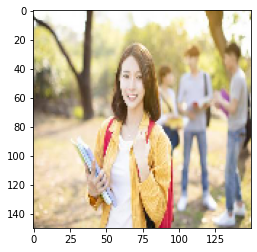

In [75]:
# Print the first 3 Classes 

plt.imshow(Test_Image1)
for i in range(3):
  print(Class_Names[list_index[i]],':' ,round(Pred[0][list_index[i]] * 100,2),'%')

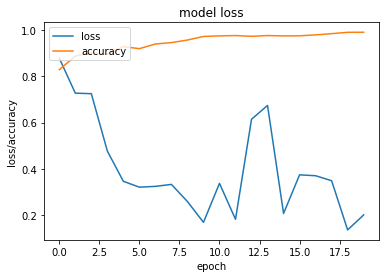

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss/accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

##===========================   **End Model**  ==============================

##**Test Data Prediction**

In [77]:
test_DF = pd.read_csv('/content/drive/MyDrive/Friendship goals Dataset/Test.csv')
test_DF

,Filename
0,Img1137.jpg
1,Img3633.jpg
2,Img1474.jpg
3,Img3459.jpg
4,Img5578.jpg
...,...
309,Img2040.jpg
310,Img1951.jpg
311,Img5148.jpg
312,Img3968.jpg


In [78]:
import cv2
import os
import glob


In [ ]:
test_DF_Path = '/content/drive/MyDrive/Friendship goals Dataset/Test Data/Test Data/*.jpg'
glob.glob(test_DF_Path)

In [24]:
Test_Images=[]
for img in glob.glob(test_DF_Path):
  df = cv2.imread(img)
  df1 = cv2.resize(df,(150,150))
  df1 = cv2.cvtColor(df1, cv2.COLOR_BGR2RGB)
  Test_Images.append(df1)

In [ ]:
Test_Images

In [50]:
##Test_Images = np.array(Test_Images)

In [81]:
pre=[]
pred = model.predict(np.array(np.array(Test_Images)))
for i in range(0,len(Test_Images)):
    p=pred[i][0]
    tmp=0
    for j in range(0,3):
        if pred[i][j]>p:
            p=pred[i][j]
            tmp=j
    pre.append(tmp)

In [82]:
len(pre)

314

In [83]:
final=[]
for i in range(len(pre)):
    if(pre[i]==0): final.append('Adults')
    elif(pre[i]==1): final.append('Teenagers')
    else: final.append('Toddler')

In [86]:
df3 = pd.DataFrame(data={"Filename":test_DF.Filename, "Labels":final})
df3.to_csv("Finally_Submission.csv")

##==============================================================================